In [1]:
import numpy as np
import matplotlib as plt
import pandas as pd

In [14]:
data = pd.read_csv('week1.txt', sep='\t', header=0)

In [15]:
data.head()

Label      1         2         3         4         5         6          7  \
0      2  3.201  5.774701  3.429272  0.108732 -0.146594 -2.140013   8.025347   
1      1  1.066  0.519693  5.936320  0.194729 -1.031533  0.678119  12.408875   
2      2  1.395  6.184605  4.393927  0.236128 -0.306630 -1.152583  12.271188   
3      1  0.062  0.106774  0.227877  0.241525 -1.734883 -2.111483  12.531931   
4      2  1.416  7.687776  3.696551  0.416807 -0.167303 -1.977925  12.915153   

          8         9         10  
0 -0.082737 -0.316598   8.970595  
1 -0.057266  0.129536   6.406818  
2 -0.216143  0.654902  17.425628  
3  0.991368  0.012839   3.487370  
4 -0.142540  0.773266  20.234659

In [16]:
import matplotlib.pyplot as plt

Text(0,0.5,'2')

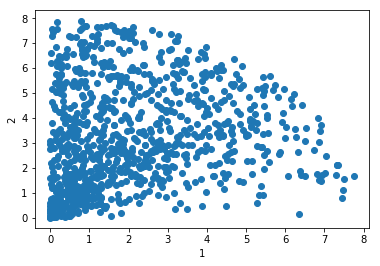

In [25]:
color= ['red' if l == 1 else 'blue' for l in data["Label"]]
plt.scatter(data["1"],data["2"])
plt.xlabel('1')
plt.ylabel('2')

Text(0,0.5,'2')

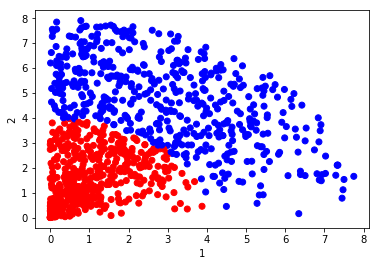

In [41]:
color= ['red' if l == 1 else 'blue' for l in data["Label"]]
plt.scatter(data["1"],data["2"],color=color)
plt.xlabel('1')
plt.ylabel('2')

Text(0.5,0.98,'plotting features pairwise')

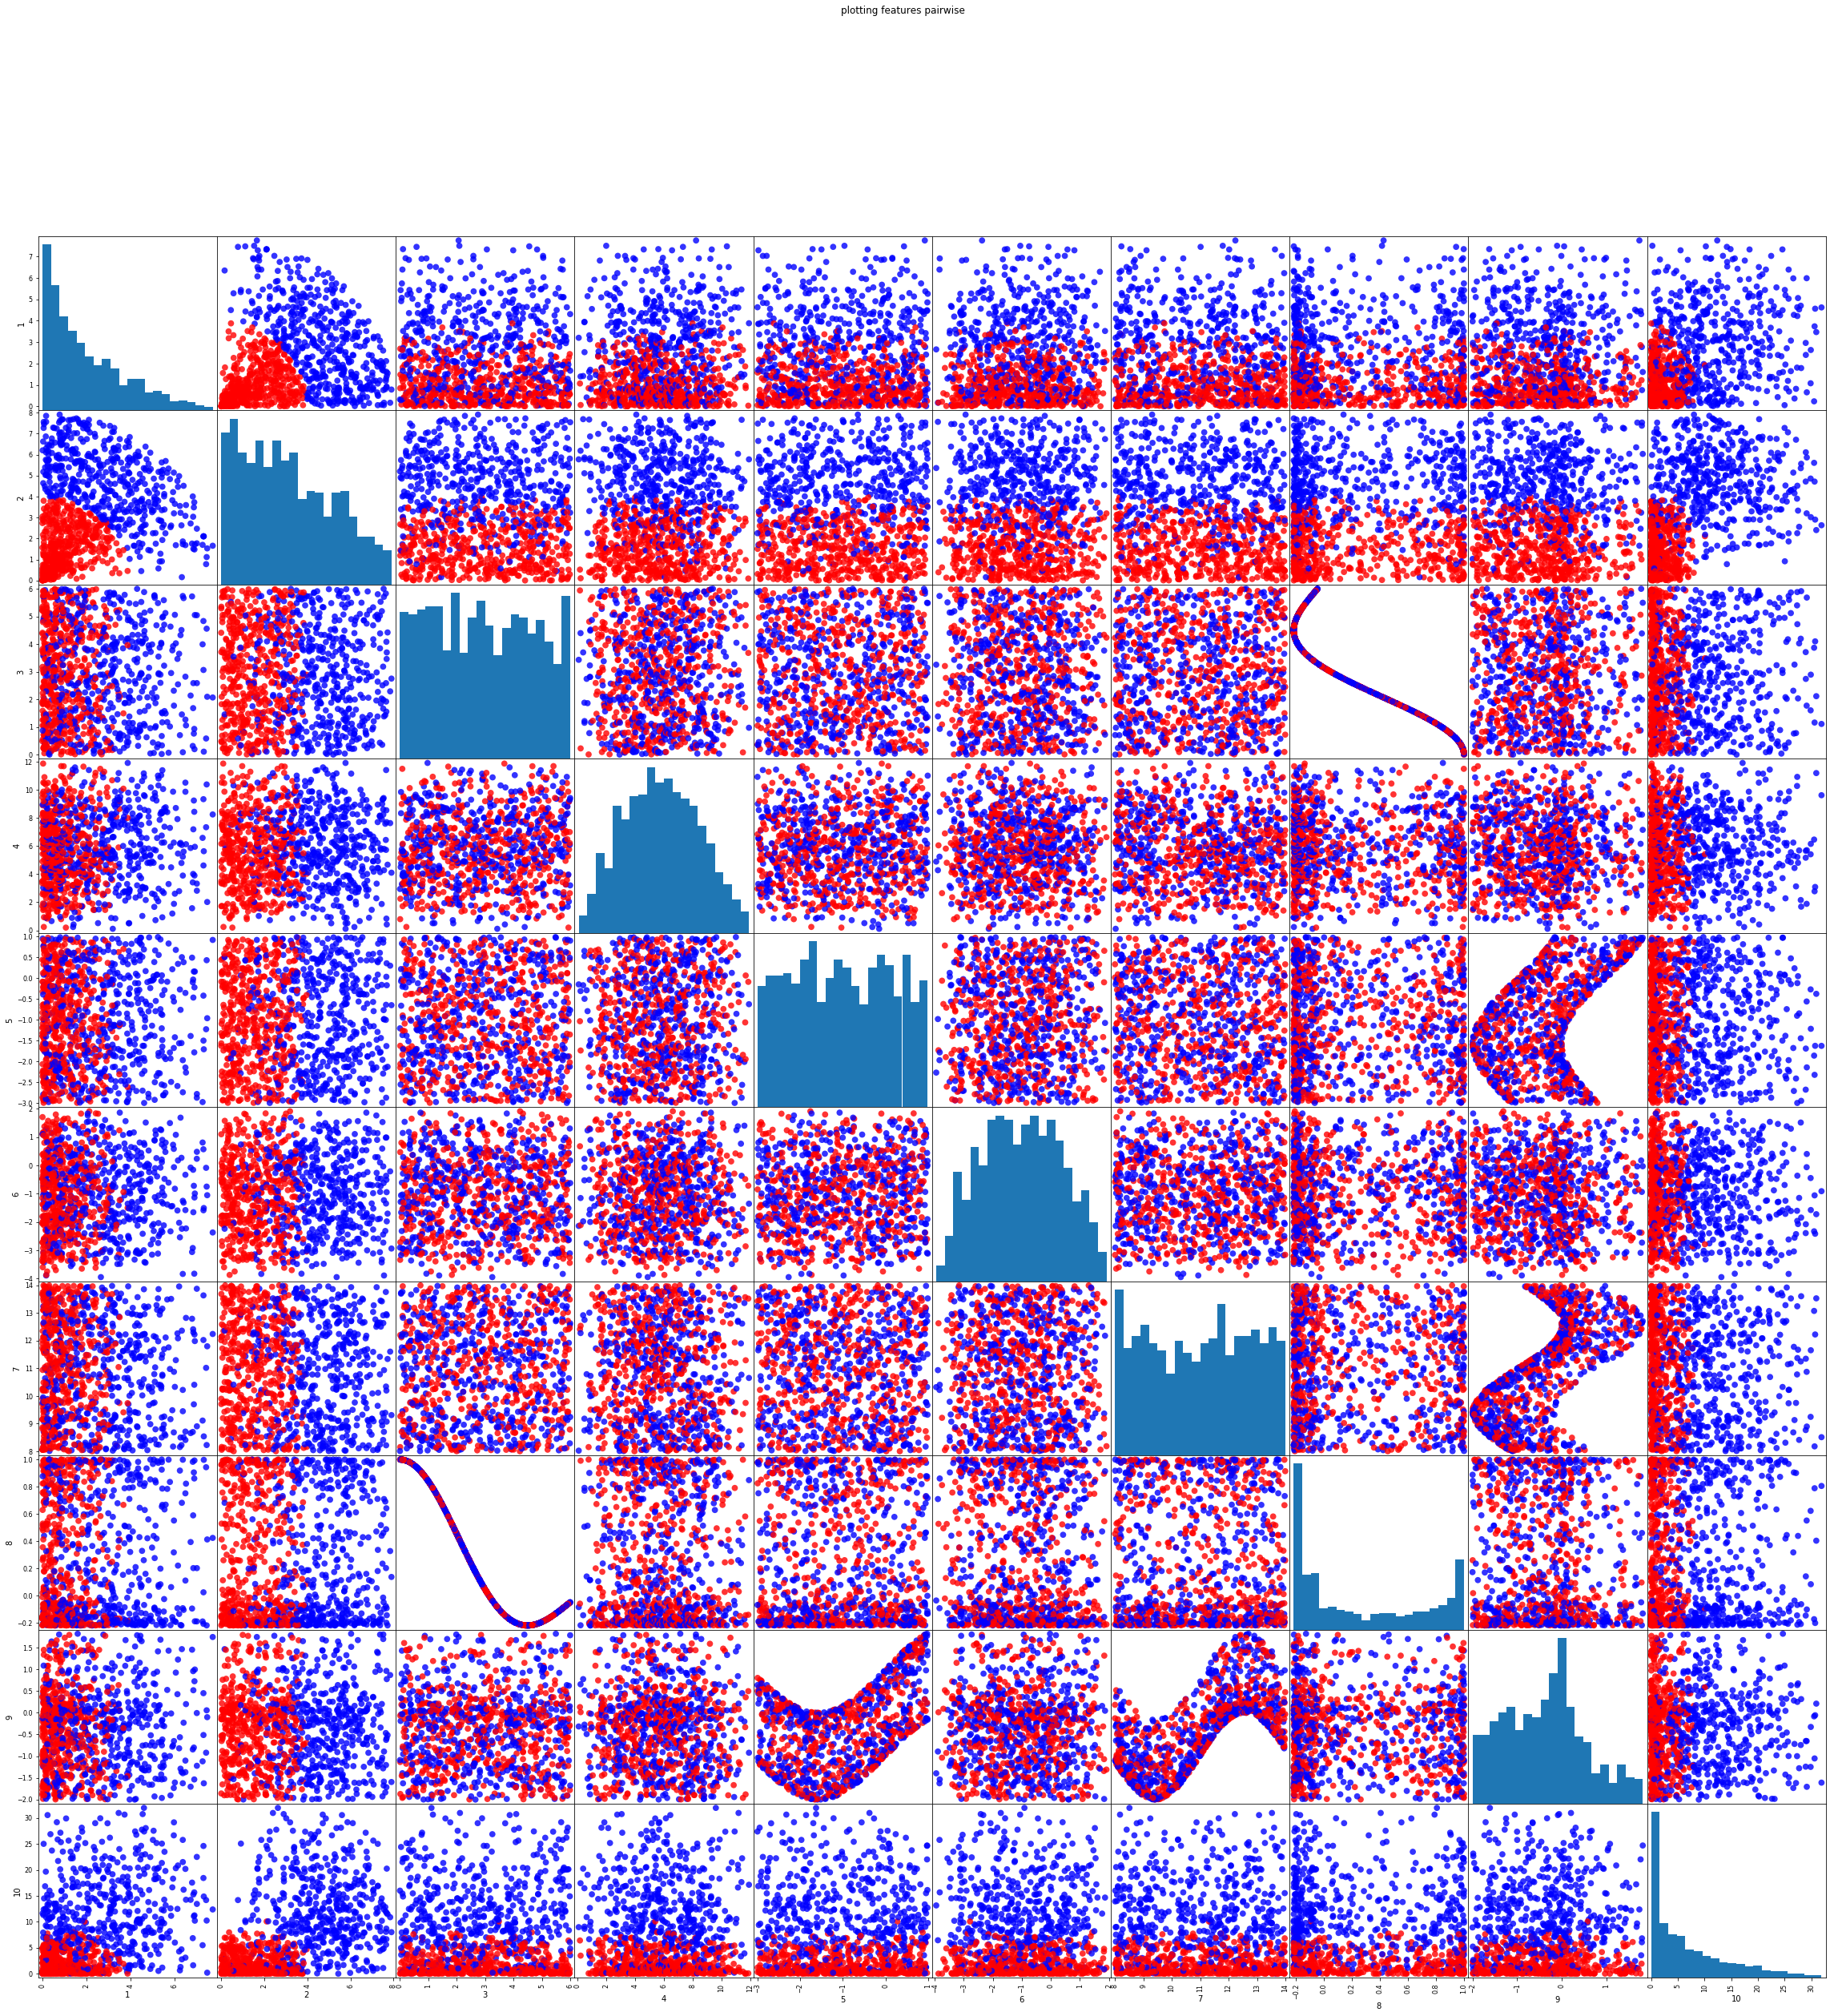

In [48]:
X = data.drop(["Label"],axis=1)
Y = data["Label"]
#dataframe = pd.DataFrame(X, columns=data.feature_names)
# create a scatter matrix from the dataframe, color by y_train
grr = pd.plotting.scatter_matrix(X, c=color, figsize=(40, 40), marker='o',
                                 hist_kwds={'bins': 20}, s=60, alpha=0.8)
plt.suptitle("plotting features pairwise")


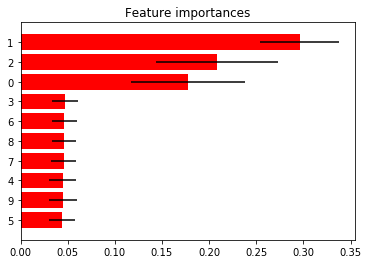

In [53]:
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

# Build a classification task using 3 informative features
X, y = make_classification(n_samples=1000,
                           n_features=10,
                           n_informative=3,
                           n_redundant=0,
                           n_repeated=0,
                           n_classes=2,
                           random_state=0,
                           shuffle=False)

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.barh(range(X.shape[1]), importances[indices],
       color="r", xerr=std[indices], align="center")
# If you want to define your own labels,
# change indices to a list of labels on the following line.
plt.yticks(range(X.shape[1]), indices)
plt.ylim([-1, X.shape[1]])
plt.show()

In [54]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
pca.fit(X)

print(pca.explained_variance_ratio_)  

print(pca.singular_values_)  


[0.18040782 0.17453681 0.09362583 0.0905726  0.0837563  0.08112224
 0.0793936  0.07759142 0.07084733 0.06814606]
[46.96276669 46.1922924  33.83170141 33.27548709 31.99887703 31.4916909
 31.15435397 30.79873277 29.42982901 28.8633253 ]


From these values calculated using PCA, we can show that 1st and 2nd features hold more importance
